# [Over and underfitting](https://github.com/kokchun/Maskininlarning-AI21/blob/main/Lectures/L3-overfitting-underfitting.ipynb)

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

<AxesSubplot:title={'center':'$y = x^2 + 0.5x + 3 + \\epsilon$'}>

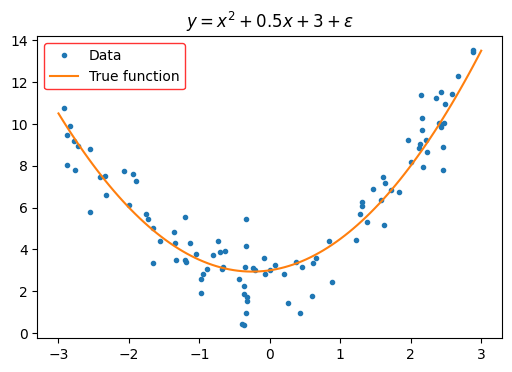

In [18]:
samples = 100
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: x**2 + .5*x + 3 
y = f(X)+np.random.randn(samples,1)

def draw_data():
    fig = plt.figure(dpi = 100)
    ax = plt.axes()
    ax.plot(X,y, '.', label="Data")

    x = np.linspace(-3,3, samples)
    ax.plot(x, f(x), label = "True function")

    ax.set(title=r"$y = x^2 + 0.5x + 3 + \epsilon$")
    ax.legend(edgecolor="r")

    return ax

draw_data()

## Polynomial regression

In [40]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree = 2, include_bias=False)

poly_X = polynomial_features.fit_transform(X)
poly_X.shape, poly_X[:3]

((100, 2),
 array([[ 2.13563823,  4.56095064],
        [ 2.43526429,  5.93051216],
        [-0.6318714 ,  0.39926147]]))

In [41]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_X, y)
model.coef_, model.intercept_

(array([[0.58159827, 1.0482124 ]]), array([2.80839694]))

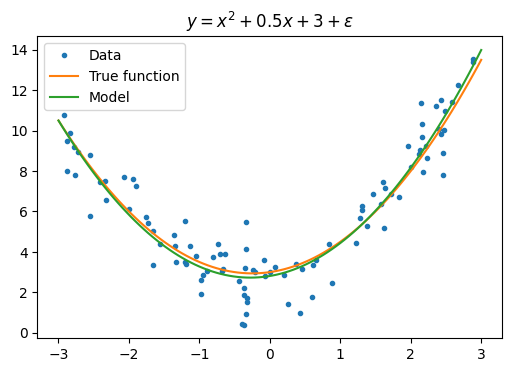

In [43]:
x = np.linspace(-3,3, samples)
x_poly_features = polynomial_features.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred, label = "Model")
ax.legend();

[Text(0.5, 1.0, 'Underfitting, model too simple')]

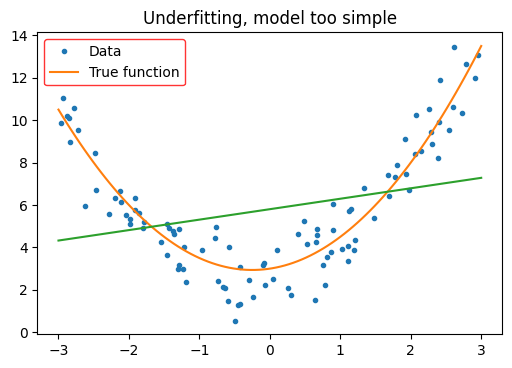

In [8]:
model = LinearRegression()
model.fit(X,y)
ax = draw_data()
ax.plot(x, model.predict(x.reshape(-1,1)))
ax.set(title="Underfitting, model too simple")

(100, 30)


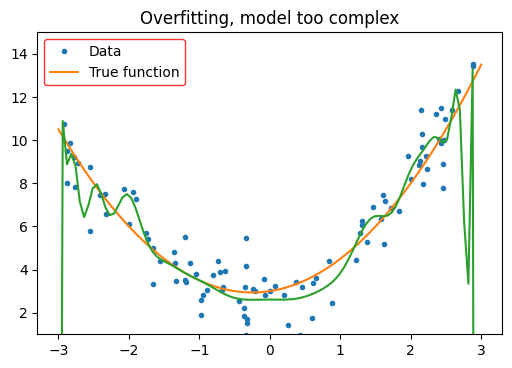

In [44]:
poly_model_30 = PolynomialFeatures(30, include_bias=False)
X_features = poly_model_30.fit_transform(X)
print(X_features.shape)

model = LinearRegression()
model.fit(X_features, y)

x = np.linspace(-3,3, samples)

x_poly_features = poly_model_30.transform(x.reshape(-1,1))
pred = model.predict(x_poly_features)

ax = draw_data()
ax.plot(x, pred)
ax.set(title="Overfitting, model too complex", ylim=[1,15]);

# The model captures more points in training data but can't generalize to test data 

In [45]:
from sklearn.model_selection import train_test_split

# we increase number of simulated samples 
samples = 10000
X = np.random.uniform(-3,3, (samples,1))
f = lambda x: 2*x**3 + x**2 + .5*x + 3 # change model to 3rd degree polynomial
y = f(X)+np.random.randn(samples,1)

print(f"X.shape: {X.shape}, y.shape: {y.shape}")

X.shape: (10000, 1), y.shape: (10000, 1)


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)
    
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((6700, 1), (6700, 1), (1650, 1), (1650, 1), (1650, 1), (1650, 1))

In [47]:
from sklearn.metrics import mean_squared_error

RMSE_val = []

for degree in range(1,100):
    model_poly = PolynomialFeatures(degree, include_bias=False) # bias False as LinearRegression has intercept by default
    train_features = model_poly.fit_transform(X_train)
    val_features = model_poly.transform(X_val)
    model_lin_reg = LinearRegression()

    model_lin_reg.fit(train_features, y_train)

    y_pred_val = model_lin_reg.predict(val_features)
    
    RMSE_val.append(np.sqrt(mean_squared_error(y_val, y_pred_val)))

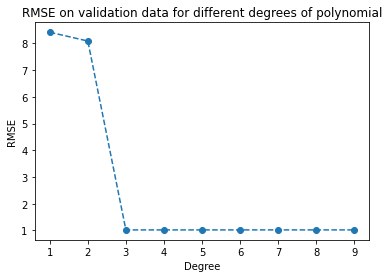

In [48]:
fig, ax = plt.figure(), plt.axes()

ax.plot(range(1,10), RMSE_val[:9],'--o', label = "Validation")
ax.set(xlabel = "Degree", ylabel = "RMSE", title = "RMSE on validation data for different degrees of polynomial");
# we see that from degreen 3 the error is low, and it doesn't change much when going higher degrees
# hence we would choose degree 3 here, which corresponds to our simulated polynomial degree. 
# this type of plot is called elbow plot.
# now we could move on to train the model using degree 3 and then predict on testing data

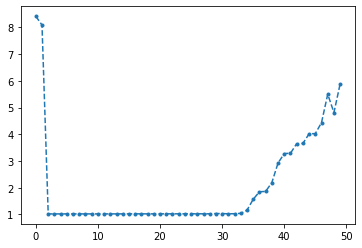

In [49]:
ax = plt.axes()

# try much higher degree polynomials and see that error actually increases 
# note that this might happen much faster for real data 
ax.plot(range(50), RMSE_val[:50],'--.', label = "Validation");